In [25]:
# import libraries

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset

data = load_iris()

In [3]:
# create X & y

X = data.data
y = data.target

In [4]:
# apply PCA on X

pca = PCA(random_state=100)
basis = pca.fit(X)

In [5]:
# basis vectors of X

basis.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [6]:
# % information contain by each principle component

basis.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

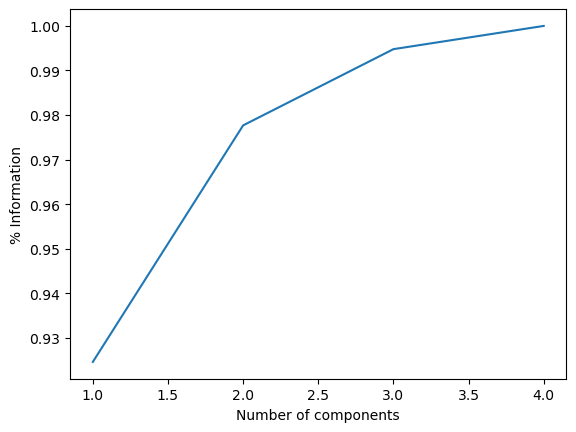

In [7]:
# scree plot

cumSum = np.cumsum(basis.explained_variance_ratio_)
plt.plot(range(1, len(cumSum)+1), cumSum)
plt.xlabel('Number of components')
plt.ylabel('% Information')
plt.show()

As per above scree plot, we can say that approx 99% of information is covered by 2 principle components.

In [12]:
# PCA with 2 components

pca = PCA(n_components=2, random_state=100)
newX = pca.fit_transform(X)

In [17]:
df = pd.DataFrame({
    'PC1': newX[:, 0],
    'PC2': newX[:, 1],
    'label': y
})

In [28]:
labelMap = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-verginica'
}

In [29]:
df['label'] = df['label'].apply(lambda x: labelMap[x])

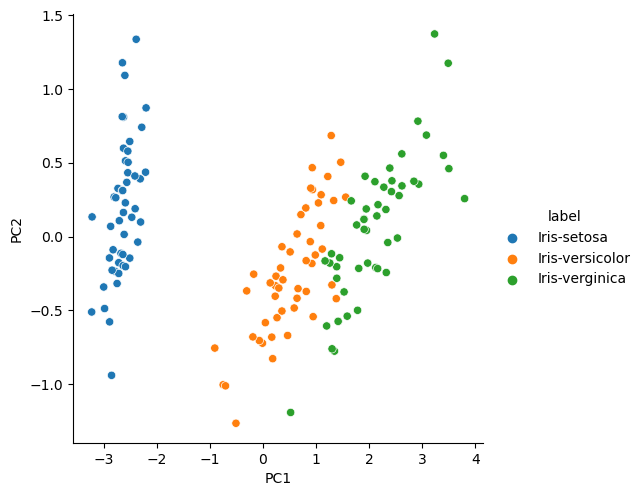

In [30]:
# plot the new df

sns.pairplot(data=df, x_vars='PC1', y_vars='PC2', hue='label', size=5)
plt.show()

## Practice questions

In [31]:
data2 = pd.read_csv('Ratings.csv')
data2.shape

(7, 5)

In [33]:
pca = PCA(random_state=100)
basis = pca.fit(data2)

In [34]:
basis.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])